<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#import-librarys" data-toc-modified-id="import-librarys-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>import librarys</a></span></li><li><span><a href="#import-data" data-toc-modified-id="import-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>import data</a></span></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Feature Engineering</a></span><ul class="toc-item"><li><span><a href="#On-train-data" data-toc-modified-id="On-train-data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>On train data</a></span><ul class="toc-item"><li><span><a href="#finding-missing-value" data-toc-modified-id="finding-missing-value-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>finding missing value</a></span></li><li><span><a href="#droping-and-imputation-of-missing-values" data-toc-modified-id="droping-and-imputation-of-missing-values-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>droping and imputation of missing values</a></span></li></ul></li><li><span><a href="#On-test-data" data-toc-modified-id="On-test-data-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>On test data</a></span><ul class="toc-item"><li><span><a href="#finding-missing-value" data-toc-modified-id="finding-missing-value-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>finding missing value</a></span></li><li><span><a href="#droping-and-imputation-of-missing-values" data-toc-modified-id="droping-and-imputation-of-missing-values-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>droping and imputation of missing values</a></span></li></ul></li></ul></li><li><span><a href="#Handling-Categorical-Features" data-toc-modified-id="Handling-Categorical-Features-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Handling Categorical Features</a></span><ul class="toc-item"><li><span><a href="#spliting-train-and-test-dataset" data-toc-modified-id="spliting-train-and-test-dataset-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>spliting train and test dataset</a></span></li></ul></li><li><span><a href="#training-Data-normalization-and-model-selection" data-toc-modified-id="training-Data-normalization-and-model-selection-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>training Data normalization and model selection</a></span><ul class="toc-item"><li><span><a href="#Data-normalization" data-toc-modified-id="Data-normalization-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Data normalization</a></span></li><li><span><a href="#model-selection" data-toc-modified-id="model-selection-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>model selection</a></span></li></ul></li><li><span><a href="#Kaggle-Submission-file" data-toc-modified-id="Kaggle-Submission-file-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Kaggle Submission file</a></span></li></ul></div>

# import librarys

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import data

In [2]:
train_df = pd.read_csv('Datasets/HousePrices_train.csv')
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
test_df = pd.read_csv('Datasets/HousePrices_test.csv')
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [176]:
# saving id column of test_df for kaggle submission
df_id = test_df[['Id']]
df_id.head()

,Id
0,1461
1,1462
2,1463
3,1464
4,1465


# Feature Engineering

## On train data

### finding missing value

<AxesSubplot: >

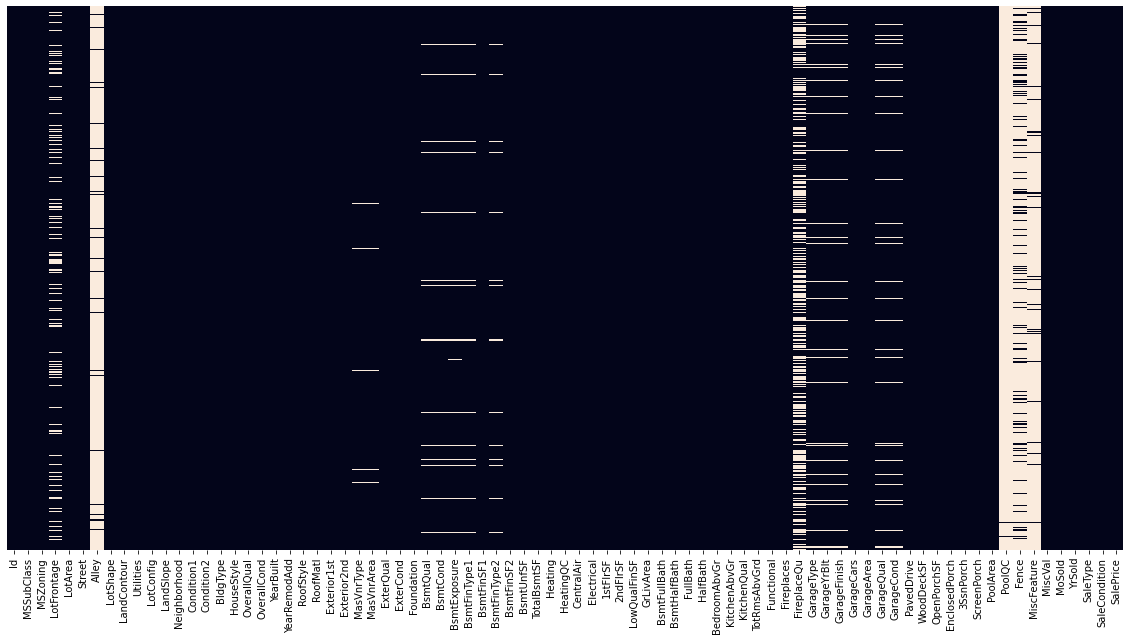

In [4]:
plt.figure(figsize=(20,10))
sns.heatmap(train_df.isnull(), yticklabels=False, cbar=False)
# white lines are missing values

In [5]:
train_df.shape

(1460, 81)

In [6]:
print("Total int columns: ", len(train_df.select_dtypes('int').columns))
print("Total float columns: ", len(train_df.select_dtypes('float').columns))
print("Total object columns: ", len(train_df.select_dtypes('object').columns))

Total int columns:  35
Total float columns:  3
Total object columns:  43


In [7]:
# columns with missing values
pd.set_option('display.max_rows', None)
ms_columns = [features for features in train_df.columns if train_df[features].isnull().sum() > 0]
train_df[ms_columns].isnull().sum().sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [8]:
# object columns with missing values
pd.set_option('display.max_rows', None)
ms_object_columns = [features for features in train_df.select_dtypes('object').columns if train_df[features].isnull().sum() > 0]
train_df[ms_object_columns].isnull().sum().sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrType         8
Electrical         1
dtype: int64

In [9]:
# int columns with missing values
pd.set_option('display.max_rows', None)
ms_int_columns = [features for features in train_df.select_dtypes('int').columns if train_df[features].isnull().sum() > 0]
train_df[ms_int_columns].isnull().sum().sort_values(ascending=False)

Series([], dtype: float64)

In [10]:
# float columns with missing values
pd.set_option('display.max_rows', None)
ms_float_columns = [features for features in train_df.select_dtypes('float').columns if train_df[features].isnull().sum() > 0]
train_df[ms_float_columns].isnull().sum().sort_values(ascending=False)

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
dtype: int64

### droping and imputation of missing values

In [11]:
# droping columns with most missing values
train_df.drop(['PoolQC','Fence','MiscFeature','Alley','FireplaceQu','LotFrontage'],axis=1,inplace=True)

In [12]:
# object columns with missing values imputation
ms_object_columns = [features for features in train_df.select_dtypes('object').columns if train_df[features].isnull().sum() > 0]
for i in ms_object_columns:
    train_df[i] = train_df[i].fillna(train_df[i].mode()[0])

In [13]:
# float columns with missing values imputation
ms_float_columns = [features for features in train_df.select_dtypes('float').columns if train_df[features].isnull().sum() > 0]
for i in ms_float_columns:
    train_df[i] = train_df[i].fillna(train_df[i].mode()[0])

In [14]:
train_df.isnull().sum().sort_values(ascending=False)

Id               0
GarageYrBlt      0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
HalfBath         0
FullBath         0
BsmtHalfBath     0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
Electrical       0
GarageType       0
GarageFinish     0
HeatingQC        0
GarageCars       0
SaleCondition    0
SaleType         0
YrSold           0
MoSold           0
MiscVal          0
PoolArea         0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
PavedDrive       0
GarageCond       0
GarageQual       0
GarageArea       0
CentralAir       0
Heating          0
MSSubClass       0
YearRemodAdd     0
OverallCond      0
OverallQual      0
HouseStyle       0
BldgType         0
Condition2       0
Condition1       0
Neighborhood     0
LandSlope        0
LotConfig        0
Utilities        0
LandContour      0
LotShape         0
Street      

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

<AxesSubplot: >

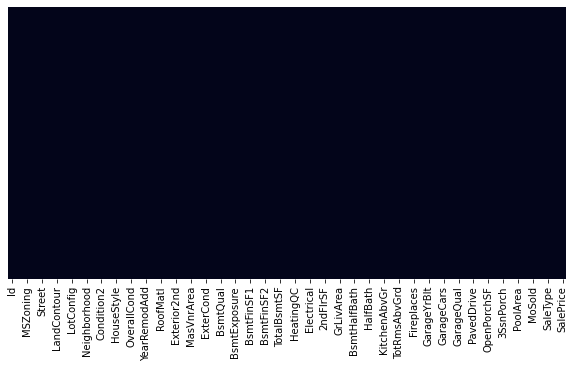

In [19]:
plt.figure(figsize=(10,5))
sns.heatmap(train_df.isnull(), yticklabels=False, cbar=False)

## On test data

### finding missing value

<AxesSubplot: >

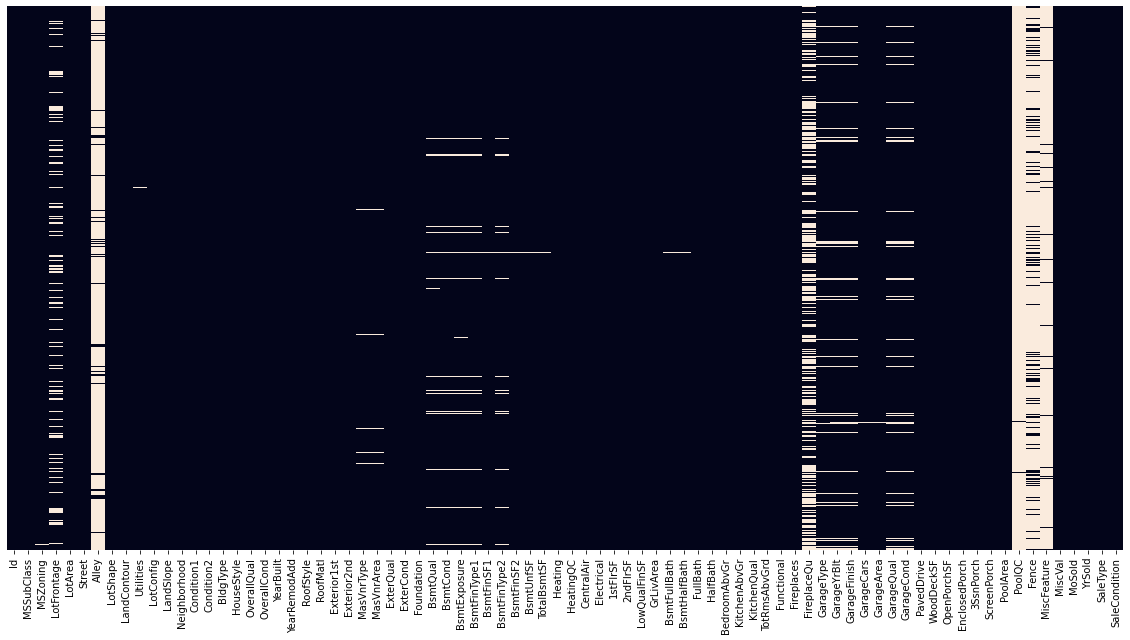

In [20]:
plt.figure(figsize=(20,10))
sns.heatmap(test_df.isnull(), yticklabels=False, cbar=False)
# white lines are missing values

In [21]:
test_df.shape

(1459, 80)

In [23]:
print("Total int columns: ", len(test_df.select_dtypes('int').columns))
print("Total float columns: ", len(test_df.select_dtypes('float').columns))
print("Total object columns: ", len(test_df.select_dtypes('object').columns))

Total int columns:  26
Total float columns:  11
Total object columns:  43


In [33]:
# columns with missing values
pd.set_option('display.max_rows', None)
ms_columns = [features for features in test_df.columns if test_df[features].isnull().sum()] 
test_df[ms_columns].isnull().sum().sort_values(ascending=False)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
Utilities          2
GarageCars         1
GarageArea         1
TotalBsmtSF        1
KitchenQual        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
SaleType           1
dtype: int64

In [35]:
ms_object_columns = [features for features in test_df.select_dtypes('object').columns if test_df[features].isnull().sum() > 0]
print("missing in object columns: ",len(test_df[ms_object_columns].isnull().sum().sort_values(ascending=False)))
ms_float_columns = [features for features in test_df.select_dtypes('float').columns if test_df[features].isnull().sum() > 0]
print("missing in float columns: ",len(test_df[ms_float_columns].isnull().sum().sort_values(ascending=False)))
ms_int_columns = [features for features in test_df.select_dtypes('int').columns if test_df[features].isnull().sum() > 0]
print("missing in int columns: ",len(test_df[ms_int_columns].isnull().sum().sort_values(ascending=False)))

missing in object columns:  22
missing in float columns:  11
missing in int columns:  0


### droping and imputation of missing values

In [36]:
# droping columns with most missing values
test_df.drop(['PoolQC','Fence','MiscFeature','Alley','FireplaceQu','LotFrontage'],axis=1,inplace=True)

In [37]:
# object columns with missing values imputation
ms_object_columns = [features for features in test_df.select_dtypes('object').columns if test_df[features].isnull().sum() > 0]
for i in ms_object_columns:
    test_df[i] = test_df[i].fillna(test_df[i].mode()[0])

In [41]:
# float columns with missing values imputation
ms_float_columns = [features for features in test_df.select_dtypes('float').columns if test_df[features].isnull().sum() > 0]
for i in ms_float_columns:
    test_df[i] = test_df[i].fillna(test_df[i].mode()[0])

In [42]:
test_df.isnull().sum().sort_values(ascending=False)

Id               0
GarageType       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
HalfBath         0
FullBath         0
BsmtHalfBath     0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
Electrical       0
CentralAir       0
Fireplaces       0
GarageYrBlt      0
MSSubClass       0
GarageFinish     0
SaleType         0
YrSold           0
MoSold           0
MiscVal          0
PoolArea         0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
PavedDrive       0
GarageCond       0
GarageQual       0
GarageArea       0
GarageCars       0
HeatingQC        0
Heating          0
TotalBsmtSF      0
BsmtUnfSF        0
OverallCond      0
OverallQual      0
HouseStyle       0
BldgType         0
Condition2       0
Condition1       0
Neighborhood     0
LandSlope        0
LotConfig        0
Utilities        0
LandContour      0
LotShape         0
Street      

In [51]:
len(train_df.drop(columns=['SalePrice']).columns) == len(test_df.columns)

True

In [53]:
train_df.drop(columns=['SalePrice']).columns == test_df.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

# Handling Categorical Features

In [55]:
print(train_df.shape)
print(test_df.shape)

(1460, 75)
(1459, 74)


In [78]:
# Combining test_df and train_df as there can be difference between categorical features of test_df and train_df
combine_df = pd.concat([train_df, test_df],axis=0)
combine_df.shape

(2919, 75)

In [79]:
combine_df.tail()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1454,2915,160,RM,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,700,7,2006,WD,Normal,NaN
1458,2919,60,RL,9627,Pave,Reg,Lvl,AllPub,Inside,Mod,...,0,0,0,0,0,11,2006,WD,Normal,NaN


```
def category_onehot_multcols(multcolumns):
    df_final = combine_df
    i=0
    for fields in multcolumns:      
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
               
    df_final=pd.concat([final_df,df_final],axis=1)        
    return df_final
```

In [75]:
ob_columns = combine_df.select_dtypes('object').columns
ob_columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [123]:
for i in ob_columns:
    new_df = pd.get_dummies(combine_df[i], drop_first=True)
    combine_df.drop([i], axis=1, inplace=True)
    combine_df = pd.concat([combine_df, new_df], axis=1)

In [124]:
len(combine_df.columns)

233

In [125]:
# removing duplicated columns
combine_df = combine_df.loc[:,~combine_df.columns.duplicated()]
len(combine_df.columns)

177

In [126]:
combine_df = combine_df.copy()
for i in combine_df.select_dtypes('uint8').columns:
    combine_df[i] = combine_df[i].astype('int64')

In [127]:
combine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Columns: 177 entries, Id to Partial
dtypes: float64(11), int64(166)
memory usage: 4.0 MB


In [128]:
combine_df.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,1,60,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [129]:
combine_df.shape

(2919, 177)

## spliting train and test dataset

In [194]:
df_Train = combine_df.iloc[:1460,:]
df_Test = combine_df.iloc[1460:,:]
df_Train = df_Train.copy() 
df_Test = df_Test.copy() 
print(df_Train.shape)
print(df_Test.shape)

(1460, 177)
(1459, 177)


In [195]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)
df_Train.drop(['Id'],axis=1,inplace=True)
df_Test.drop(['Id'],axis=1,inplace=True)

In [196]:
print(df_Train.shape)
print(train_df.shape)

(1460, 176)
(1460, 75)


In [197]:
print(df_Test.shape)
print(test_df.shape)

(1459, 175)
(1459, 74)


In [198]:
train_df.tail(1)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1459,1460,20,RL,9937,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2008,WD,Normal,147500


In [199]:
df_Train.tail(1)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
1459,20,9937,5,6,1965,1965,0.0,830.0,290.0,136.0,...,0,0,0,0,1,0,0,0,1,0


In [200]:
test_df.head(1)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal


In [201]:
df_Test.head(1)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,20,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0


# training Data normalization and model selection

## Data normalization

In [236]:
X_train = df_Train.drop(['SalePrice'],axis=1)
y_train = df_Train['SalePrice'] 

In [237]:
feature_list = X_train.columns
len(feature_list)

175

In [238]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit and transform are both applied on training data
X_train[feature_list] = scaler.fit_transform(X_train[feature_list])

# only transform is applied on test data as features used to fit training data is applied in test data to perform transform 
df_Test[feature_list] = scaler.transform(df_Test[feature_list])

In [239]:
X_train.head(2)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,0.073375,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,-0.944591,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1,-0.872563,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.288653,-0.641228,...,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995


In [240]:
df_Test.head(2)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,-1.366166,-1.054007,-4.986874,-4.668748,-65.301119,-96.229764,-0.573909,-0.972901,-0.284906,-1.285699,...,-1.062057,-1.062057,-1.393143,-1.047436,-1.409852,-1.055161,-1.099322,-1.13174,-0.919647,-1.399628
1,-1.366166,-1.053980,-4.463688,-4.668748,-65.304410,-96.236807,-0.570601,-0.970712,-0.290443,-1.285002,...,-1.062057,-1.062057,-1.393143,-1.047436,-1.409852,-1.055161,-1.099322,-1.13174,-0.919647,-1.399628


## model selection

In [241]:
import xgboost
regressor = xgboost.XGBRegressor()
regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [242]:
from sklearn.metrics import mean_squared_error  
import math  

print("RMSE Metrics for train set")
y_pred_train_set = regressor.predict(X_train)
mse = mean_squared_error(y_train, y_pred_train_set)
print("Mean Squared Error(MSE) is ", mse)
RMSE = math.sqrt(mse)
print("Root Mean Squared Error(RMSE) is ", RMSE)

RMSE Metrics for train set
Mean Squared Error(MSE) is  3049765.98287296
Root Mean Squared Error(RMSE) is  1746.3579194635217


In [244]:
from sklearn.metrics import r2_score
r2 = r2_score(y_train, y_pred_train_set)*100
print("r2_score: ",r2)

r2_score:  99.9516431232536


# Kaggle Submission file

In [209]:
y_pred = regressor.predict(df_Test)
len(y_pred)

1459

In [210]:
y_pred

array([123341.67, 148668.89, 184229.36, ..., 158471.52, 103705.96,
       229072.73], dtype=float32)

In [211]:
# Create Sample Submission file 
pred_df = pd.DataFrame(y_pred, columns=['SalePrice'])
submission_df = pd.concat([df_id, pred_df], axis=1)
submission_df.to_csv('KaggleSubmissions/HousePriceSub.csv',index=False)